In this project I have considered data from year 2000-2015 for 193 countries for Life expectancy prediction. 
This dataset was downloaded from https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who?select=Life+Expectancy+Data.csv



In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.model_selection import cross_val_predict
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
print(f"tensorflow: {tf.version.VERSION}")
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling


tensorflow: 2.13.0


In [4]:
df = pd.read_csv('Life Expectancy Data.csv')

### EXPLORATORY DATA ANALYSIS

In [5]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
df.columns


Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

let us check the variance first and determine if any of the features have low variance which would mean they are constant and hence they may not be great predictors


In [8]:
df.var()

Year                               2.128753e+01
Life expectancy                    9.070405e+01
Adult Mortality                    1.544852e+04
infant deaths                      1.390666e+04
Alcohol                            1.642205e+01
percentage expenditure             3.951805e+06
Hepatitis B                        6.285057e+02
Measles                            1.314983e+08
 BMI                               4.017633e+02
under-five deaths                  2.574277e+04
Polio                              5.488733e+02
Total expenditure                  6.241601e+00
Diphtheria                         5.624919e+02
 HIV/AIDS                          2.578390e+01
GDP                                2.036377e+08
Population                         3.722476e+15
 thinness  1-19 years              1.953812e+01
 thinness 5-9 years                2.033002e+01
Income composition of resources    4.448031e-02
Schooling                          1.128234e+01
dtype: float64

But it seems all these are actually varying quite a bit. We will only delete two columns which may not be a good predictors in general

In [9]:
df= df.drop('Year', axis=1)

In [10]:
df = df.drop('Country', axis=1)

In [11]:
df = df.drop('Status', axis=1)

In [12]:
df.shape

(2938, 19)

In [13]:
df.isnull().sum()

Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [14]:
df = df.drop('Population', axis=1)

In [15]:
df.describe()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,27.700000,28.600000,0.948000,20.700000


#### Check if there are any NaNs in the dataset and then find the total number of NaNs for each feature

In [17]:
print(df.shape)
print(df.isnull().sum())
df = df.dropna()


(1853, 18)
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


### Checking the correlation of various features with Life Expectancy

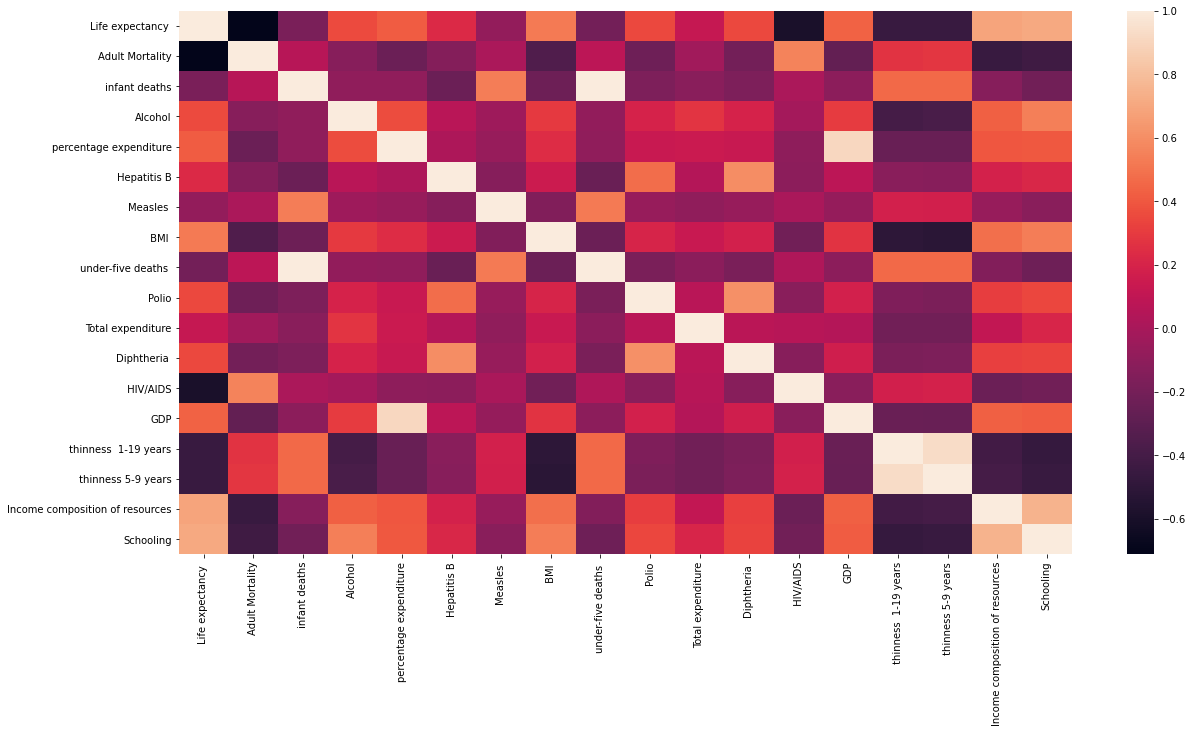

In [18]:
fig_dims=(20,10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df.corr(), ax=ax)
plt.show()

In [19]:
X = df.drop(columns='Life expectancy ')
y=df['Life expectancy ']

In [106]:
df.describe()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000
mean,70.033459,158.678899,29.083648,4.392936,764.909479,80.811657,1993.519698,39.130275,39.483540,84.834862,5.783751,85.195359,1.777550,6762.022729,4.809498,4.844307,0.643335,12.315920
std,8.612327,122.262195,114.426007,3.994051,1760.244275,24.993749,9538.200814,19.803882,154.256362,21.706160,2.342064,21.085823,5.720649,12849.824365,4.385905,4.436416,0.190560,2.856585
min,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,0.100000,0.100000,0.000000,0.000000
25%,65.300000,74.000000,0.000000,0.660000,41.910524,77.000000,0.000000,21.200000,0.000000,83.000000,4.200000,83.000000,0.100000,526.531352,1.700000,1.800000,0.527000,10.600000
50%,72.500000,138.000000,2.000000,3.570000,169.202397,92.000000,13.000000,44.900000,3.000000,94.000000,5.660000,93.000000,0.100000,1937.995490,3.400000,3.400000,0.691000,12.500000
75%,75.500000,217.000000,18.000000,7.380000,591.775757,96.000000,292.000000,56.400000,22.000000,97.000000,7.350000,97.000000,0.500000,5836.177630,6.800000,6.800000,0.776000,14.200000
max,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,27.200000,28.200000,0.936000,20.700000


In [20]:
abs(df.corr()["Life expectancy "])

Life expectancy                    1.000000
Adult Mortality                    0.712391
infant deaths                      0.183360
Alcohol                            0.351447
percentage expenditure             0.414617
Hepatitis B                        0.224694
Measles                            0.083156
 BMI                               0.523265
under-five deaths                  0.205842
Polio                              0.347743
Total expenditure                  0.117230
Diphtheria                         0.347371
 HIV/AIDS                          0.592430
GDP                                0.436948
 thinness  1-19 years              0.452388
 thinness 5-9 years                0.455534
Income composition of resources    0.688784
Schooling                          0.706841
Name: Life expectancy , dtype: float64

In [21]:
#we will only choose features which have a correlation coefficient of >0.4 with Life expectancy
abs(df.corr()["Life expectancy "][abs(df.corr()["Life expectancy "])>0.4].drop("Life expectancy ")).index.to_list()

['Adult Mortality',
 'percentage expenditure',
 ' BMI ',
 ' HIV/AIDS',
 'GDP',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

#### CROSS VALIDATION

In [22]:
cv = KFold(n_splits=10, shuffle=False)
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
y_pred = cross_val_predict(classifier_pipeline, X, y,cv=cv)
print("RMSE:"+ str(round(sqrt(mean_squared_error(y,y_pred)),2)))
print("R_squared:" +str(round(r2_score(y, y_pred),2)))

RMSE:4.01
R_squared:0.78


### use different values of r to select the r value at which the RMSE is lowest and R_squared is the highest

In [23]:
vals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
for val in vals:
    features = abs(df.corr()["Life expectancy "][abs(df.corr()["Life expectancy "])>val].drop("Life expectancy ")).index.to_list()
    X = df.drop(columns='Life expectancy ')
    X= X[features]
    y = df['Life expectancy ']
    print(features)
    y_pred = cross_val_predict(classifier_pipeline, X, y,cv=cv)
    print("RMSE:"+ str(round(sqrt(mean_squared_error(y,y_pred)),2)))
    print("R_squared:" +str(round(r2_score(y, y_pred),2)))

['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']
RMSE:3.98
R_squared:0.79
['Adult Mortality', 'Alcohol', 'percentage expenditure', 'Hepatitis B', ' BMI ', 'under-five deaths ', 'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']
RMSE:3.6
R_squared:0.83
['Adult Mortality', 'Alcohol', 'percentage expenditure', ' BMI ', 'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']
RMSE:3.35
R_squared:0.85
['Adult Mortality', 'percentage expenditure', ' BMI ', ' HIV/AIDS', 'GDP', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']
RMSE:3.16
R_squared:0.87


 #### SO here we will choose the one with the lowest RMSE. The lowest RMSE here is 2.9 and R_squared value for that is 0.89. The features selected here are adult mortality, BMI, HIV/AIDS, Income composition of resources, schooling

In [111]:
df2 = df[['Adult Mortality',' BMI ',' HIV/AIDS','Income composition of resources', 'Schooling','Life expectancy ']]

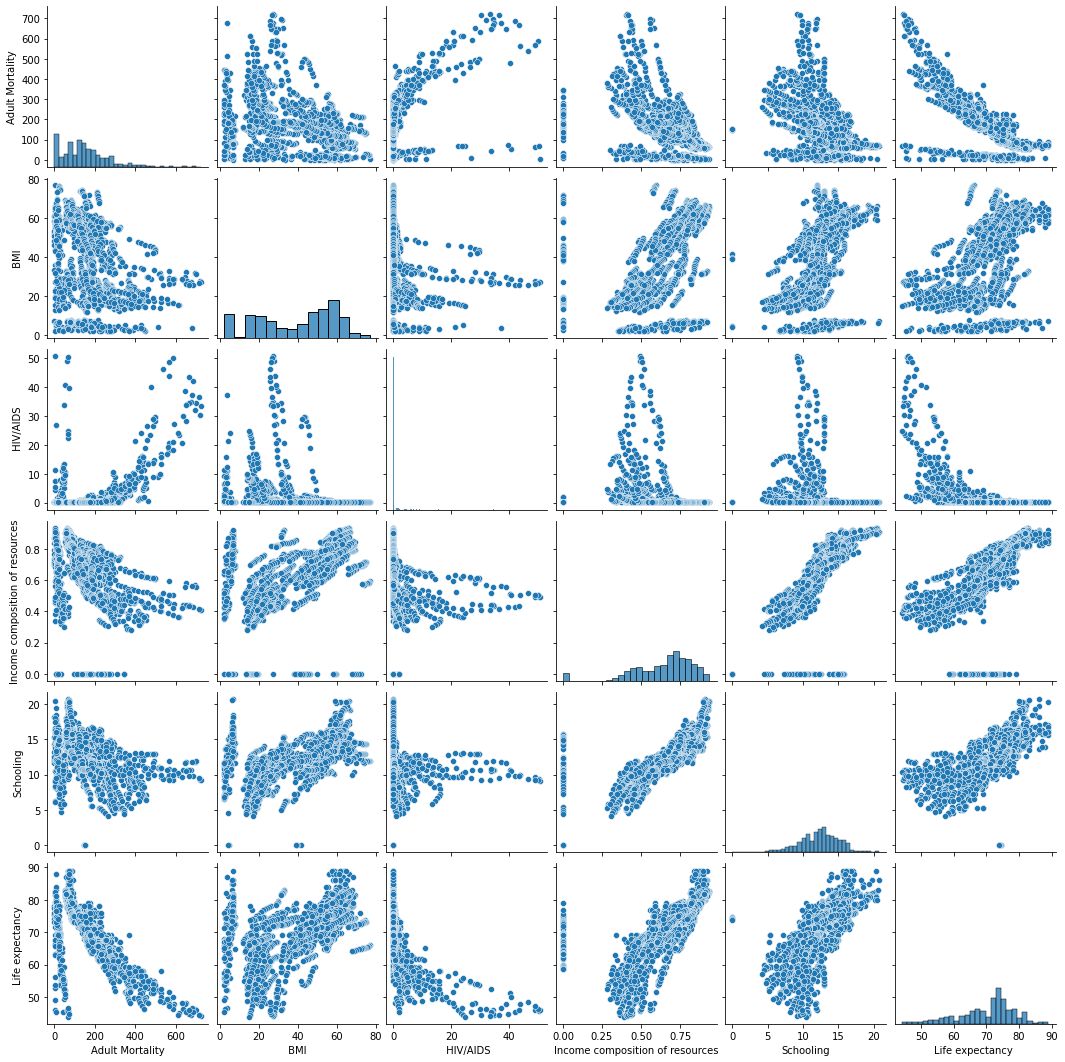

In [112]:
sns.pairplot(df2)

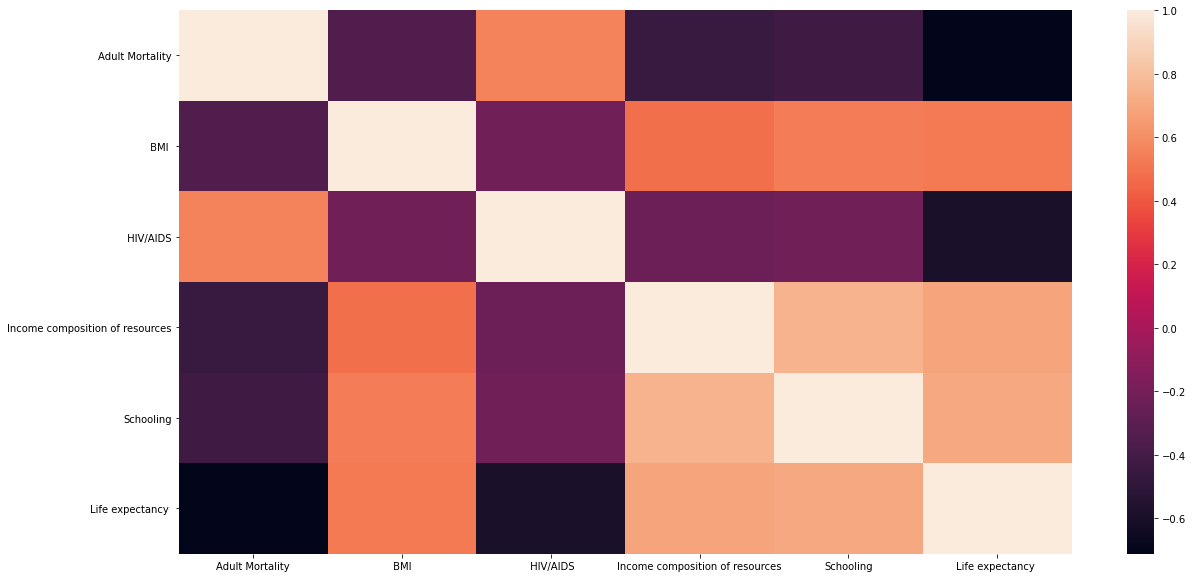

In [113]:
fig_dims=(20,10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df2.corr(), ax=ax)
plt.show()

In [24]:
X = df[['Adult Mortality',' BMI ',' HIV/AIDS','Income composition of resources', 'Schooling']]
Y = df['Life expectancy ']

In [107]:
X.describe()

,Adult Mortality,BMI,HIV/AIDS,Income composition of resources,Schooling
count,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000
mean,158.678899,39.130275,1.777550,0.643335,12.315920
std,122.262195,19.803882,5.720649,0.190560,2.856585
min,1.000000,2.000000,0.100000,0.000000,0.000000
25%,74.000000,21.200000,0.100000,0.527000,10.600000
50%,138.000000,44.900000,0.100000,0.691000,12.500000
75%,217.000000,56.400000,0.500000,0.776000,14.200000
max,723.000000,77.100000,50.600000,0.936000,20.700000


In [25]:
X.shape


(1853, 5)

#### Split the data into train and test data

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2


In [27]:
print(X_train.shape)
print(y_train.shape)

(1111, 5)
(1111,)


In [28]:
print(X_test.shape)
print(y_test.shape)

(371, 5)
(371,)


In [29]:
X_val.shape

(371, 5)

In [30]:
tf.random.set_seed(13)# to make sure experiment is redproducible



In [31]:
ss = StandardScaler()

In [42]:
cols = X_train.columns
X_train_sc = pd.DataFrame(ss.fit_transform(X_train), columns=cols)
X_val_sc = pd.DataFrame(ss.fit_transform(X_val), columns=cols)
X_test_sc = pd.DataFrame(ss.transform(X_test), columns=cols)


In [60]:
X_train_sc

,Adult Mortality,BMI,HIV/AIDS,Income composition of resources,Schooling
0,3.015110,-0.390456,1.334383,-0.786198,-0.557348
1,-1.070581,0.603033,-0.284750,0.712488,0.938424
2,1.857222,-0.400698,0.968772,-0.528692,-0.343667
3,0.806852,-0.226581,0.342011,0.176875,0.048083
4,3.039922,-1.163738,2.640135,-1.254859,-0.984712
...,...,...,...,...,...
1106,-0.731486,1.473616,-0.284750,1.083297,0.368606
1107,-1.111935,-1.911415,-0.180290,-1.126106,-1.981893
1108,-0.566073,0.802755,-0.284750,0.506483,0.653515
1109,-1.227723,0.976872,-0.284750,0.789740,0.867197


## Build  neural network model
 we will create three different nueral network models with different hyperparameters

In [91]:
def build_model1_two_hidden_layers():
     # Keras model object created from Sequential class. This will be the container that contains all layers.
     model = Sequential()
     #the model is empty. it does not have any layers. We will start adding components to the model.We will construct a model with 2 hidden layer
     #and one input and one output
     #input layer with 10 neurons
     model.add(Dense(10, input_shape=(5,)))
     model.add(Dense(50, Activation('relu')))
     model.add(Dense(50, Activation('relu')))
     model.add(Dense(1))
        
     learning_rate = 0.001
     optimizer = optimizers.RMSprop(learning_rate)
     model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', 'mape']) # for regression problems, mean squared error (MSE) is often employed
    
     return model

In [40]:
model = build_model1_two_hidden_layers()
print('here is a summary of the model:')
model.summary()

here is a summary of the model:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 50)                550       
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3211 (12.54 KB)
Trainable params: 3211 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
# We decalred a function for creating a model.
def build_model2_three_hidden_layers():
    # Keras model object created from Sequential class. This will be the container that contains all layers.
    model = Sequential()

    # The model so far is empty. It can be constructed by adding layers and compilation.
    # This Keras model with multiple hidden layers.
    
    # Input Layer with 32 Neurons
    model.add(Dense(32, input_shape = (5,)))    # Input layer => input_shape must be explicitly designated
#     model.add(Activation('relu')) # relu or sigmoid.
    
    model.add(Dense(32,Activation('relu')))                         # Hidden layer 1 => only output dimension should be designated (output dimension = # of Neurons = 32)
    
    
    model.add(Dense(64, Activation('relu')))                         # Hidden layer 2 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(128, Activation('relu')))                         # Hidden layer 3 => only output dimension should be designated (output dimension = # of Neurons = 128)

    
    model.add(Dense(1))                          # Output layer => output dimension = 1 since it is a regression problem
    
    # Activation: sigmoid, softmax, tanh, relu, LeakyReLU. 
    #Optimizer: SGD, Adam, RMSProp, etc. # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    learning_rate = 0.001
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', 'mape']) # for regression problems, mean squared error (MSE) is often employed
    
    return model

model2 = build_model2_three_hidden_layers()
print('Here is a summary of this model: ')
model2.summary()

Here is a summary of this model: 
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 32)                192       
                                                                 
 dense_27 (Dense)            (None, 32)                1056      
                                                                 
 dense_28 (Dense)            (None, 64)                2112      
                                                                 
 dense_29 (Dense)            (None, 128)               8320      
                                                                 
 dense_30 (Dense)            (None, 1)                 129       
                                                                 
Total params: 11809 (46.13 KB)
Trainable params: 11809 (46.13 KB)
Non-trainable params: 0 (0.00 Byte)
__________________________________________________

In [45]:
def build_model3_five_hidden_layers():
    # Keras model object created from Sequential class. This will be the container that contains all layers.
    model = Sequential()

    # The model so far is empty. It can be constructed by adding layers and compilation.
    # This Keras model with multiple hidden layers.
    
    # Input Layer with 32 Neurons
    model.add(Dense(32, input_shape = (5,)))    # Input layer => input_shape must be explicitly designated
#     model.add(Activation('relu')) # relu or sigmoid.
    
    model.add(Dense(64,Activation('relu')))                         # Hidden layer 1 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(64, Activation('relu')))                         # Hidden layer 2 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(64, Activation('relu')))                         # Hidden layer 3 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(64, Activation('relu')))                         # Hidden layer 4 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(64, Activation('relu')))                         # Hidden layer 5 => only output dimension should be designated (output dimension = # of Neurons = 64)

    
    model.add(Dense(1))                          # Output layer => output dimension = 1 since it is a regression problem
    
    # Activation: sigmoid, softmax, tanh, relu, LeakyReLU. 
    #Optimizer: SGD, Adam, RMSProp, etc. # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    learning_rate = 0.001
    optimizer = optimizers.RMSprop(learning_rate)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', 'mape']) # for regression problems, mean squared error (MSE) is often employed
    
    return model

model3 = build_model3_five_hidden_layers()
print('Here is a summary of this model: ')
model3.summary()

Here is a summary of this model: 
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                192       
                                                                 
 dense_10 (Dense)            (None, 64)                2112      
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)   

In [47]:
# Test the model before training (this will use the initial weights.) which in fact will generate random values.
example_batch=X_train_sc[:10] #take the first 10 datapoints
example_result=model.predict(example_batch)
example_result

1/1 [==============================] - 0s 25ms/step


array([[-0.00144108],
       [-0.09201173],
       [-0.06531151],
       [ 0.13873146],
       [-0.24915901],
       [-0.16586357],
       [-0.5452832 ],
       [ 0.03490704],
       [ 0.00175149],
       [ 0.09264602]], dtype=float32)

#### Save Checkpoints in the model

In [51]:
# pip install -q pyyaml h5py  # Required to save models in HDF5 format

checkpoint_path = r".\models\life_expectancy_prediction.ckpt"

# Create a callback that saves the model's weights
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 monitor='val_loss', # or val_accuracy if you have classification model.
                                                 save_best_only=True, # Default false. If you don't change the file name then the output will be overritten at each step and only the last model will be saved.
                                                 save_weights_only=True, # True => model.save_weights (weights and no structure, you need JSON file for structure), False => model.save (saves weights & structure)
                                                 verbose=0,
                                                  )

# epoch refers to the number of times the data is passed through the model. After each epoch the model is updated to new weights

### Training the models we builts

In [92]:
%%time
EPOCHS=500
batch_size=32 
model = build_model1_two_hidden_layers()
print('Here is a summary of the model: ')
model.summary

with tf.device('/CPU:0'):
    history = model.fit(X_train_sc, y_train, batch_size=batch_size, epochs=EPOCHS, verbose=0, shuffle=True, steps_per_epoch=int(X_train_sc.shape[0]/batch_size), validation_data=(X_val_sc,y_val), callbacks=[tfdocs.modeling.EpochDots(),ckpt_callback])

Here is a summary of the model: 

Epoch: 0, loss:4744.5244,  mae:68.3137,  mape:97.2447,  mse:4744.5244,  val_loss:4330.6455,  val_mae:65.1605,  val_mape:93.4737,  val_mse:4330.6455,  
....................................................................................................
Epoch: 100, loss:6.7084,  mae:1.9735,  mape:2.8756,  mse:6.7084,  val_loss:9.0797,  val_mae:2.3726,  val_mape:3.4630,  val_mse:9.0797,  
....................................................................................................
Epoch: 200, loss:5.2777,  mae:1.6827,  mape:2.4214,  mse:5.2777,  val_loss:8.5681,  val_mae:2.4095,  val_mape:3.6110,  val_mse:8.5681,  
....................................................................................................
Epoch: 300, loss:5.0411,  mae:1.6259,  mape:2.3387,  mse:5.0411,  val_loss:6.6821,  val_mae:1.9362,  val_mape:2.7803,  val_mse:6.6821,  
....................................................................................................


In [93]:
hist = pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.tail()

,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
495,4.560487,1.566849,4.560487,2.235244,7.128530,2.103008,7.128530,3.044677,495
496,4.253017,1.529154,4.253017,2.181566,6.586375,1.987282,6.586375,2.897020,496
497,4.828387,1.604740,4.828387,2.314269,6.699153,1.956127,6.699153,2.877468,497
498,4.760961,1.622777,4.760961,2.323893,6.796589,1.919410,6.796589,2.752244,498
499,4.316576,1.534718,4.316576,2.181095,7.176518,2.129965,7.176518,3.174699,499


In [94]:
# Test the model after training.
example_batch = X_train_sc[:10]
example_result = model.predict(example_batch)
print('predicted values: ')
example_result

1/1 [==============================] - 0s 57ms/step
predicted values: 


array([[54.34264 ],
       [74.394684],
       [58.966316],
       [65.951065],
       [52.99932 ],
       [75.73318 ],
       [53.489845],
       [79.86243 ],
       [72.59932 ],
       [69.19649 ]], dtype=float32)

In [95]:
print(' the ground truth is : ')
y_train[:10]

 the ground truth is : 


1475    52.1
1348    69.5
2490    58.4
948     64.6
1577    50.0
1610    75.4
426     53.4
1638    87.0
639     77.5
1455    73.0
Name: Life expectancy , dtype: float64

In [96]:
#for testing dataset
example_batch = X_test_sc[:10]
example_result = model.predict(example_batch)
print('predicted values: ')
example_result

1/1 [==============================] - 0s 25ms/step
predicted values: 


array([[75.83003 ],
       [64.147316],
       [60.864536],
       [80.79106 ],
       [84.419876],
       [70.69002 ],
       [68.82635 ],
       [78.32208 ],
       [60.124638],
       [74.68871 ]], dtype=float32)

In [97]:
print('The ground truth: ')
y_test[:10]

The ground truth: 


640     77.6
1654    62.5
1787    59.2
1636    81.1
497     82.0
2832    68.0
296     66.5
643     77.7
2159    59.6
980     74.5
Name: Life expectancy , dtype: float64

### Let's See how the training went by plotting the loss/mse across epochs

Text(0, 0.5, 'MAE [life expectancy prediction]')

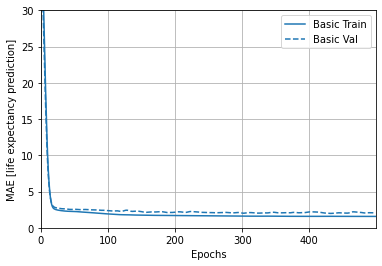

In [98]:
plot_loss = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plot_loss.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 30])
plt.ylabel('MAE [life expectancy prediction]')

Text(0, 0.5, 'MSE [life expectancy prediction]')

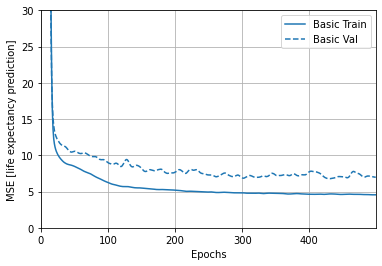

In [99]:
plot_loss = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plot_loss.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 30])
plt.ylabel('MSE [life expectancy prediction]')

Text(0, 0.5, 'Loss [life expectancy prediction]')

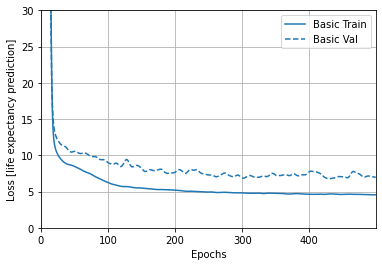

In [100]:
plot_loss = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plot_loss.plot({'Basic': history}, metric = "loss")
plt.ylim([0, 30])
plt.ylabel('Loss [life expectancy prediction]')

12/12 [==============================] - 0s 1ms/step


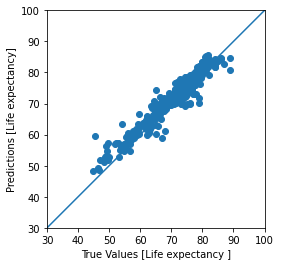

In [101]:
test_predictions = model.predict(X_test_sc).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [Life expectancy ]')
plt.ylabel('Predictions [Life expectancy]')
lims = [30, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [102]:
corr_matrix = np.corrcoef(test_predictions, y_test)
corr = corr_matrix[0,1]
R_sq = corr**2
print(corr)
print(R_sq)

0.956213617521815
0.9143444823341559


In [103]:
print('Error Rate on Test Split: ')
loss, mae, mse, mape = model.evaluate(X_test_sc, y_test, verbose=2)

print("Testing set Mean Abs Error    : {:5.2f} life expectancy".format(mae))
print("Testing set Mean Squared Error: {:5.2f} life expectancy".format(mse))

Error Rate on Test Split: 
12/12 - 0s - loss: 7.5053 - mae: 2.0645 - mse: 7.5053 - mape: 3.1077 - 38ms/epoch - 3ms/step
Testing set Mean Abs Error    :  2.06 life expectancy
Testing set Mean Squared Error:  7.51 life expectancy


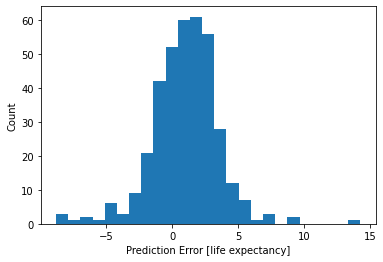

In [104]:
# error distribution.
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [life expectancy]")
_ = plt.ylabel("Count")

## SAVE THE MODEL USING PICKLE

In [108]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))